In [28]:
import numpy as np
data = '''
#  nocc  nkpts    homo        lumo         HF        MP2_CORR     CCSD        CCSD(T)            AFQMC/HF                AFQMC/CISD             AFQMC_CCSD_PT   
    7     19    1.041458    2.323245    8.491481    -0.374488   -0.276499   -0.00143386     8.213755 +/- 0.000447   8.213394 +/- 0.000087   8.213346 +/- 0.000047
    19    57    0.941321    1.612902    21.53163    -1.339463   -0.871764   -0.02312924     20.638722 +/- 0.001270  20.640604 +/- 0.000537  20.640806 +/- 0.000323
    27    81    1.173273    1.765074    30.73921    -1.488206   -1.166448   -0.02838345     29.548341 +/- 0.001048  29.549256 +/- 0.000504  29.549288 +/- 0.000260
    33    81    1.494678    1.954239    40.76304    -2.506615   -1.510069   -0.07127460     39.199122 +/- 0.002439  39.203371 +/- 0.001468  39.201652 +/- 0.000974
    57    81    1.159401    1.491376    74.35786    -7.598330   -3.707447   -0.34338575     70.430508 +/- 0.005504  70.425696 +/- 0.007753  70.424129 +/- 0.006502
    81    251   1.159401    1.607118    97.68401    -7.490199   -4.753331   -0.30009481                                                     92.730204 +/- 0.004835 
    93    251   1.418428    1.652981    116.4565    -9.600449   -5.295077   -0.40617950
'''
nocc = []
nkpts = []
homo = []
lumo = []
ehf = []
mp2_corr = []
ccsd_corr = []
ccsd_t = []
afqmc_hf = []
afqmc_hf_err = []
afqmc_ci = []
afqmc_ci_err = []
afqmc_pt = []
afqmc_pt_err = []

for line in data.splitlines():
    if not line.startswith('#') and len(line) > 0:
        parts = line.split()
        if len(parts) == 17:
            nocc = np.hstack((nocc,int(parts[0])))
            nkpts = np.hstack((nkpts,int(parts[1])))
            homo = np.hstack((homo,float(parts[2])))
            lumo = np.hstack((lumo,float(parts[3])))
            ehf = np.hstack((ehf,float(parts[4])))
            mp2_corr = np.hstack((mp2_corr,float(parts[5])))
            ccsd_corr = np.hstack((ccsd_corr,float(parts[6])))
            ccsd_t = np.hstack((ccsd_t,float(parts[7])))
            afqmc_hf = np.hstack((afqmc_hf,float(parts[8])))
            afqmc_hf_err = np.hstack((afqmc_hf_err,float(parts[10])))
            afqmc_ci = np.hstack((afqmc_ci,float(parts[11])))
            afqmc_ci_err = np.hstack((afqmc_ci_err,float(parts[13])))
            afqmc_pt = np.hstack((afqmc_pt,float(parts[14])))
            afqmc_pt_err = np.hstack((afqmc_pt_err,float(parts[16])))

In [32]:
nelec = nocc*2
gap = lumo - homo
inv_gap = 1/gap
ehf_pe = ehf/nelec
mp2_corr_pe = mp2_corr/nelec
emp2_pe = ehf_pe + mp2_corr_pe
ccsd_corr_pe = ccsd_corr/nelec
eccsd_pe = ehf_pe + ccsd_corr_pe
ccsd_t_pe = ccsd_t/nelec
eccsd_t_pe = eccsd_pe + ccsd_t_pe
afqmc_hf_pe = afqmc_hf/nelec
afqmc_hf_err_pe = afqmc_hf_err/nelec
afqmc_ci_pe = afqmc_ci/nelec
afqmc_ci_err_pe = afqmc_ci_err/nelec
afqmc_pt_pe = afqmc_pt/nelec
afqmc_pt_err_pe = afqmc_pt_err/nelec

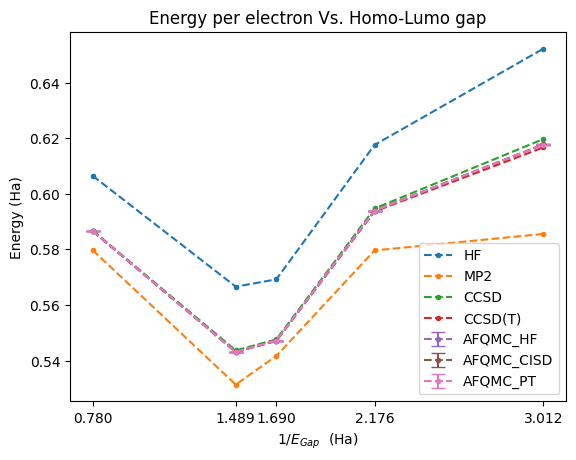

In [35]:
from matplotlib import pyplot as plt
plt.plot(inv_gap,ehf_pe,'.--',color='C0',label='HF')
plt.plot(inv_gap,emp2_pe,'.--',color='C1',label='MP2')
plt.plot(inv_gap,eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(inv_gap,eccsd_t_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(inv_gap,afqmc_hf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(inv_gap,afqmc_ci_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(inv_gap,afqmc_pt_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(inv_gap)
plt.xlabel('1/$E_{Gap}$  (Ha)')
plt.ylabel('Energy (Ha)')
plt.title('Energy per electron Vs. Homo-Lumo gap')
plt.legend()
plt.show()

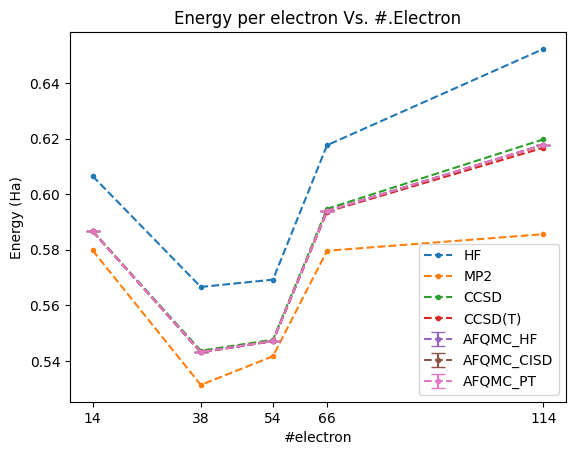

In [36]:
from matplotlib import pyplot as plt
plt.plot(nelec,ehf_pe,'.--',color='C0',label='HF')
plt.plot(nelec,emp2_pe,'.--',color='C1',label='MP2')
plt.plot(nelec,eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(nelec,eccsd_t_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy per electron Vs. #.Electron')
plt.legend()
plt.show()

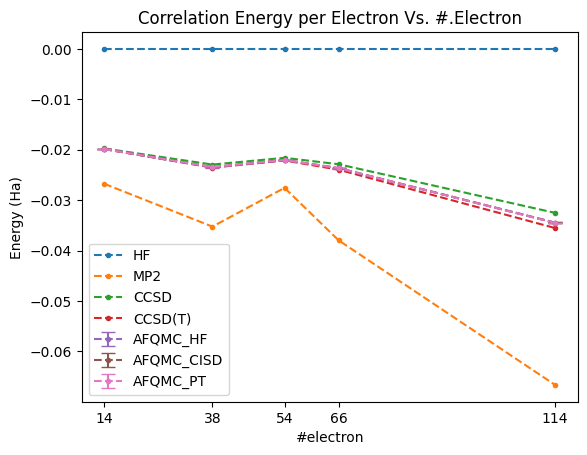

In [37]:
from matplotlib import pyplot as plt
plt.plot(nelec,ehf_pe-ehf_pe,'.--',color='C0',label='HF')
plt.plot(nelec,emp2_pe-ehf_pe,'.--',color='C1',label='MP2')
plt.plot(nelec,eccsd_pe-ehf_pe,'.--',color='C2',label='CCSD')
plt.plot(nelec,eccsd_t_pe-ehf_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe-ehf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe-ehf_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe-ehf_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Correlation Energy per Electron Vs. #.Electron')
plt.legend()
plt.show()

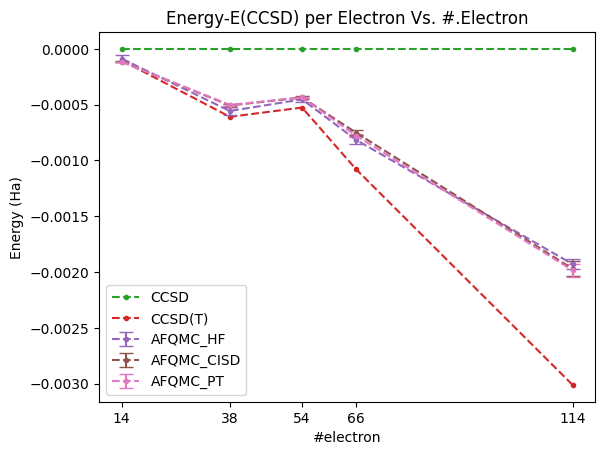

In [38]:
from matplotlib import pyplot as plt
# plt.plot(nelec,ehf_pe-ehf_pe,'.--',color='C0',label='HF')
# plt.plot(nelec,emp2_pe-ehf_pe,'.--',color='C1',label='MP2')
plt.plot(nelec,eccsd_pe-eccsd_pe,'.--',color='C2',label='CCSD')
plt.plot(nelec,eccsd_t_pe-eccsd_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe-eccsd_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe-eccsd_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe-eccsd_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy-E(CCSD) per Electron Vs. #.Electron')
plt.legend()
plt.show()

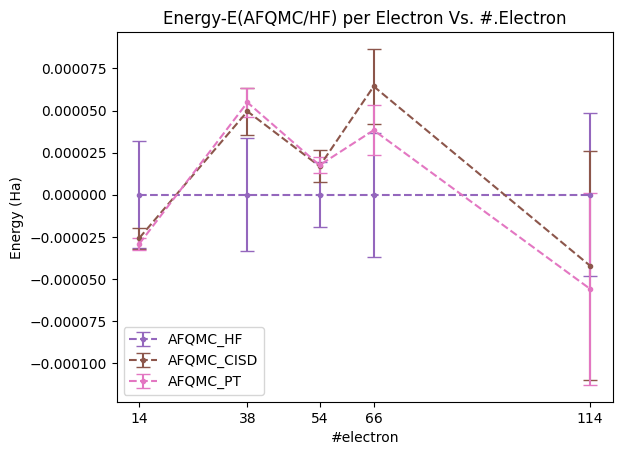

In [39]:
from matplotlib import pyplot as plt
# plt.plot(nelec,ehf_pe-ehf_pe,'.--',color='C0',label='HF')
# plt.plot(nelec,emp2_pe-ehf_pe,'.--',color='C1',label='MP2')
# plt.plot(nelec,eccsd_pe-eccsd_pe,'.--',color='C2',label='CCSD')
# plt.plot(nelec,eccsd_t_pe-eccsd_pe,'.--',color='C3',label='CCSD(T)')
plt.errorbar(nelec,afqmc_hf_pe-afqmc_hf_pe,yerr=afqmc_hf_err_pe,fmt='.--',capsize=5,color='C4',label='AFQMC_HF')
plt.errorbar(nelec,afqmc_ci_pe-afqmc_hf_pe,yerr=afqmc_ci_err_pe,fmt='.--',capsize=5,color='C5',label='AFQMC_CISD')
plt.errorbar(nelec,afqmc_pt_pe-afqmc_hf_pe,yerr=afqmc_pt_err_pe,fmt='.--',capsize=5,color='C6',label='AFQMC_PT')
plt.xticks(nelec)
plt.xlabel('#electron')
plt.ylabel('Energy (Ha)')
plt.title('Energy-E(AFQMC/HF) per Electron Vs. #.Electron')
plt.legend()
plt.show()